Interpolated values for waypoints1: [ 0.66  0.76  0.86  0.96  1.06  1.16  1.26  1.36  1.46  1.56  1.66  1.76
  1.86  1.96  2.06  2.16  2.26  2.36  2.46  2.56  2.66  2.76  2.86  2.96
  3.06  3.16  3.26  3.36  3.46  3.56  3.66  3.76  3.86  3.96  4.06  4.16
  4.26  4.36  4.46  4.56  4.66  4.76  4.86  4.96  5.06  5.16  5.26  5.36
  5.46  5.56  5.66  5.76  5.86  5.96  6.06  6.16  6.26  6.36  6.46  6.56
  6.66  6.76  6.86  6.96  7.06  7.16  7.26  7.36  7.46  7.56  7.66  7.76
  7.86  7.96  8.06  8.16  8.26  8.36  8.46  8.56  8.66  8.76  8.86  8.96
  9.06  9.16  9.26  9.36  9.46  9.56  9.66  9.76  9.86  9.96 10.06 10.16
 10.26]
Interpolated values for waypoints2: []


ValueError: x and y must have same first dimension, but have shapes (97,) and (0,)

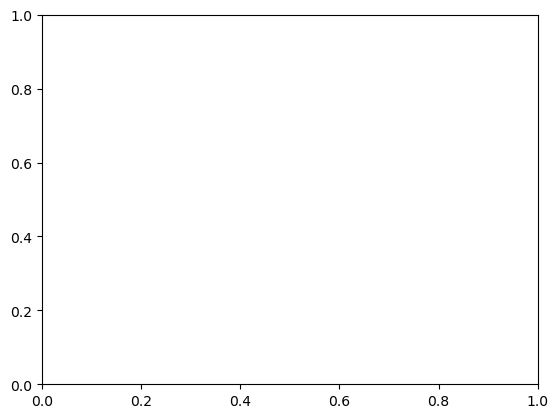

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Your 1D numpy arrays containing the waypoints
# waypoints1 = np.array([0, 2, 4, 6, 8])
# waypoints2 = np.array([0, 3, 6, 9, 12])

waypoints1 = np.array([0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31])
waypoints2 = np.array([5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68])

# Create interpolation functions for each array
interp_func1 = interp1d(waypoints1, waypoints1, kind='linear')
interp_func2 = interp1d(waypoints2, waypoints2, kind='linear')

# Set the constant distance between each point
distance = 0.1

# Generate new points with a constant distance of 0.1 between them
new_points1 = np.arange(waypoints1[0], waypoints1[-1], distance)
new_points2 = np.arange(waypoints2[0], waypoints2[-1], distance)

# Interpolate the values at the new points
interp_values1 = interp_func1(new_points1)
interp_values2 = interp_func2(new_points2)

print("Interpolated values for waypoints1:", interp_values1)
print("Interpolated values for waypoints2:", interp_values2)

plt.plot(waypoints1, waypoints2, 'o', new_points1, new_points2, '-')

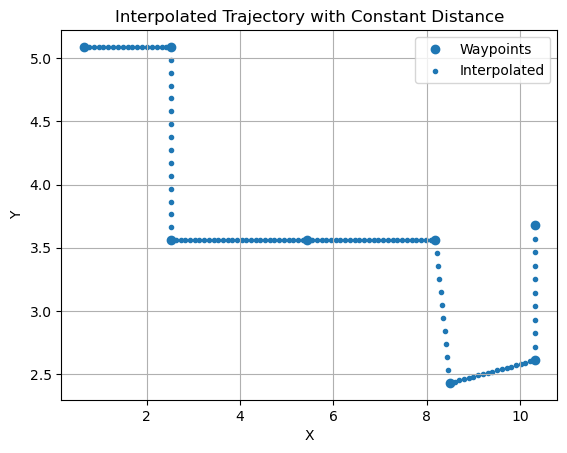

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Your 1D numpy arrays containing the x and y coordinates
x_coords = np.array([0, 2, 4, 6, 8])
y_coords = np.array([0, 3, 6, 9, 12])

x_coords = np.array([0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31])
y_coords = np.array([5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68])
# Combine the x and y coordinates into a single 2D array
waypoints = np.column_stack((x_coords, y_coords))

# Set the constant distance between each point
distance_step = 0.1

def interpolate_2d(waypoints, distance_step):
    interpolated_points = [waypoints[0]]
    for i in range(1, len(waypoints)):
        dist = np.linalg.norm(waypoints[i] - waypoints[i-1])
        num_points = int(np.ceil(dist / distance_step))
        t_values = np.linspace(0, 1, num=num_points)
        
        for t in t_values:
            point = waypoints[i-1] + t * (waypoints[i] - waypoints[i-1])
            if not np.allclose(point, interpolated_points[-1]):
                interpolated_points.append(point)

    return np.array(interpolated_points)

interp_values = interpolate_2d(waypoints, distance_step)

# Plot the original waypoints
plt.plot(waypoints[:, 0], waypoints[:, 1], 'o', label='Waypoints')

# Plot the interpolated points
plt.scatter(interp_values[:, 0], interp_values[:, 1], marker='.', label='Interpolated')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title('Interpolated Trajectory with Constant Distance')
plt.show()


[0.10388889 0.20777778 0.31166667 0.41555556 0.51944444 0.62333333
 0.72722222 0.83111111 0.935      1.03888889 1.14277778 1.24666667
 1.35055556 1.45444444 1.55833333 1.66222222 1.76611111 1.87
 1.87277975 1.88109436 1.89487097 1.91399164 1.93829822 1.96759854
 2.0016733  2.04028331 2.08317642 2.13009389 2.18077601 2.23496667
 2.29241707 2.35288844 2.41615397 2.49462597 2.57461757 2.65599148
 2.73862447 2.82240596 2.90723666 2.99302735 3.07969782 3.16717583
 3.25539629 3.34430044 3.43383518 3.52395244 3.61460865 3.70576427
 3.79738332 3.88943306 3.98188362 4.07470771 4.16788038 4.26137877
 4.35518189 4.44927047 4.54362678 4.63823449 4.7330785  4.82814491
 4.92342082 5.0188943  5.11563891 5.21256366 5.30965868 5.40691481
 5.50432349 5.60187678 5.69956725 5.79738796 5.89533243 5.99339459
 6.09156876 6.18984962 6.28823215 6.38671165 6.48528372 6.58394419
 6.68268915 6.78151491 6.88041798 6.97939508 7.0784431  7.17755912
 7.27674034 7.37598414 7.47528802 7.57464963 7.67406672 7.72274868
 

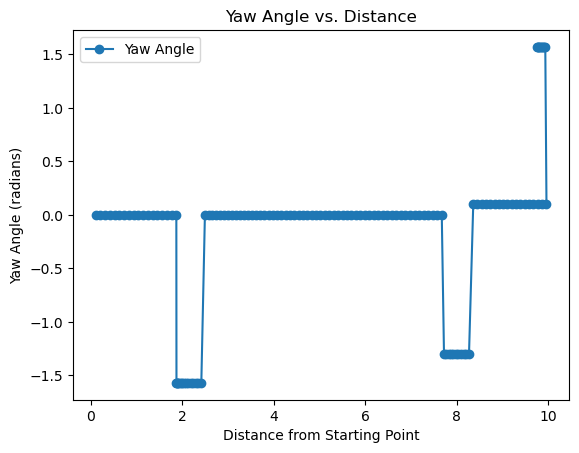

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Your 1D numpy arrays containing the x and y coordinates
x_coords = np.array([0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31])
y_coords = np.array([5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68])

# Combine the x and y coordinates into a single 2D array
waypoints = np.column_stack((x_coords, y_coords))

# Set the constant distance between each point
distance_step = 0.1

def interpolate_2d(waypoints, distance_step):
    interpolated_points = [waypoints[0]]
    for i in range(1, len(waypoints)):
        dist = np.linalg.norm(waypoints[i] - waypoints[i-1])
        num_points = int(np.ceil(dist / distance_step))
        t_values = np.linspace(0, 1, num=num_points)
        
        for t in t_values:
            point = waypoints[i-1] + t * (waypoints[i] - waypoints[i-1])
            if not np.allclose(point, interpolated_points[-1]):
                interpolated_points.append(point)

    return np.array(interpolated_points)

interp_values = interpolate_2d(waypoints, distance_step)

def compute_distances_and_yaw_angles(interp_values):
    distances = np.linalg.norm(interp_values - interp_values[0], axis=1)
    delta_points = np.diff(interp_values, axis=0)
    yaw_angles = np.arctan2(delta_points[:, 1], delta_points[:, 0])
    return distances[1:], yaw_angles

distances, yaw_angles = compute_distances_and_yaw_angles(interp_values)

print(distances)
# Plot the yaw angle with respect to the distance
plt.plot(distances, yaw_angles, '-o', label='Yaw Angle')
plt.xlabel('Distance from Starting Point')
plt.ylabel('Yaw Angle (radians)')
plt.legend()
plt.title('Yaw Angle vs. Distance')
plt.show()
